# Script to deteremine the vertical scale height for DNS systems

This script performs the analysis described in Sec. 2.3 of the paper.

In [2]:
import numpy as np, scipy
import matplotlib.pyplot as pl
import pandas as pd
import plot_conf_int

#%pylab
%matplotlib inline

### Read in data about ALL known DNS systems.

The table "all_dns.txt" was generated using the [ATNF Pulsar catalog](http://www.atnf.csiro.au/research/pulsar/psrcat/)

In [12]:
#Read in the table
data = pd.read_csv("all_dns.txt", sep = ',', index_col = 'NAME', comment = '#')

In [13]:
data

,Survey,Gl,Gb,P0,P1,DM,PB,A1,ECC,ZZ,merger_time
NAME,,,,,,,,,,,
J0453+1559,ar372,184.1,-17.1,0.045782,1.860000e-19,30.0,4.0725,14.47,0.11250,-0.15,1.430000e+12
J0737-3039A,"pkshl, htru_pks",245.2,-4.5,0.022699,1.760000e-18,49.0,0.1023,1.42,0.08778,-0.09,8.500000e+07
J1411+2551,ar327,33.4,72.1,0.062453,9.560000e-20,12.0,2.6159,9.21,0.16990,1.08,4.600000e+11
J1518+4904,"gb4, gbncc",80.8,54.3,0.040935,2.720000e-20,12.0,8.6340,20.04,0.24950,0.78,2.400000e+12
B1534+12,"ar4, gb4",19.8,48.3,0.037904,2.420000e-18,12.0,0.4207,3.73,0.27370,0.79,2.930000e+09
J1753-2240,"pksmb, htru_pks",6.3,1.7,0.095138,9.700000e-19,159.0,13.6376,18.12,0.30360,0.09,NaN
J1756-2251,"pksmb, htru_pks",6.5,0.9,0.028462,1.020000e-18,121.0,0.3196,2.76,0.18060,0.01,1.690000e+09
J1811-1736,"pksmb, htru_pks",12.8,0.4,0.104182,9.010000e-19,476.0,18.7792,34.78,0.82800,0.03,1.000000e+12
J1829+2456,ar4,53.3,15.6,0.041010,5.250000e-20,14.0,1.1760,7.24,0.13910,0.24,6.000000e+10


### Calculate the median and error associated with the vertical scale height returned from the simulation and the DM $\times$ sin$(b)$ for all DNS systems

In [5]:
all_dmsinb_median = (data['DM'] * np.sin(data['Gb'].abs() * np.pi / 180.)).median()
all_dmsinb_median_err = (data['DM'] * np.sin(data['Gb'].abs() * np.pi / 180.)).std() / np.sqrt(len(data))

all_zht_median = data['ZZ'].abs().median()
all_zht_median_err = data['ZZ'].abs().std() / np.sqrt(len(data))

print "Median dmsinb =", all_dmsinb_median, "with error =", all_dmsinb_median_err
print "Median z ht =", all_zht_median, "with error =", all_zht_median_err

Median dmsinb = 4.71693280953 with error = 1.32105297792
Median z ht = 0.15 with error = 0.0880360676447


### Separate the DNS systems into merging and non-merging systems. We do not make use of this partitioned data, but it does provide some interesting insights into the data


In [6]:
mergers = data.loc[['J0737-3039A', 'B1534+12', 'J1756-2251', 'J1906+0746', 'J1913+1102', 'B1913+16', 'J1757-1854', 'J1946+2052'], :]
non_mergers = data.loc[['J0453+1559', 'J1411+2551', 'J1518+4904', 'J1753-2240', 'J1811-1736', 'J1829+2456', 'J1930-1852'], :]

print len(data), len(mergers), len(non_mergers)

15 8 7


In [7]:
merging_dmsinb_median = (mergers['DM'] * np.sin(mergers['Gb'].abs() * np.pi / 180.)).median()
merging_dmsinb_median_err = (mergers['DM'] * np.sin(mergers['Gb'].abs() * np.pi / 180.)).std() / np.sqrt(len(mergers))

merging_zht_median = mergers['ZZ'].abs().median()
merging_zht_median_err = mergers['ZZ'].abs().std() / np.sqrt(len(mergers))

print "Mean dmsinb =", merging_dmsinb_median, "with error =", merging_dmsinb_median_err
print "Mean z ht =", merging_zht_median, "with error =", merging_zht_median_err

Mean dmsinb = 3.56252419035 with error = 2.16892798507
Mean z ht = 0.115 with error = 0.0938832386531


In [8]:
nonmerging_dmsinb_median = (non_mergers['DM'] * np.sin(non_mergers['Gb'].abs() * np.pi / 180.)).median()
nonmerging_dmsinb_median_err = (non_mergers['DM'] * np.sin(non_mergers['Gb'].abs() * np.pi / 180.)).std() / np.sqrt(len(non_mergers))

nonmerging_zht_median = non_mergers['ZZ'].abs().median()
nonmerging_zht_median_err = non_mergers['ZZ'].abs().std() / np.sqrt(len(non_mergers))

print "Mean dmsinb =", nonmerging_dmsinb_median, "with error =", nonmerging_dmsinb_median_err
print "Mean z ht =", nonmerging_zht_median, "with error =", nonmerging_zht_median_err

Mean dmsinb = 8.82120975697 with error = 1.42955614692
Mean z ht = 0.24 with error = 0.150956136351


# Read in the numpy o/p files from PsrPopPy simulations for all possible z-heights and plot the relevant statistics calculated above for all DNS systems

The output files used in the paper are provided in this repo. If they do not appear here, please contact the corresponding author.

In [14]:
zscale = np.arange(0.1, 2.1, 0.1)

z_hts = np.load("z_ht.npy")
z_hts_error = np.load("z_ht_err.npy")

dm_sinb = np.load("dm_signb.npy")
dm_sinb_err = np.load("dm_signb_err.npy")

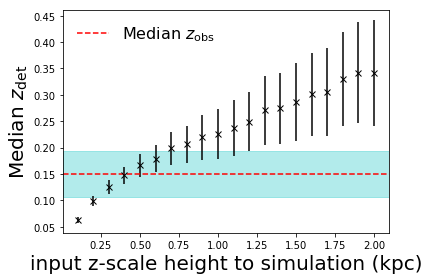

In [15]:
#pl.figure(figsize = (20, 10))

pl.errorbar(zscale, z_hts, yerr = z_hts_error, marker = 'x', ls = '', color = 'k')

pl.axhline(y = all_zht_median, ls = '--', color = 'r', label = r"Median $z_{\rm obs}$")
#pl.axhline(y = merging_zht_mean, ls = '--', color = 'r', label = r"$\left<\left| z \right| \right>_{\rm obs}$")
#pl.axhline(y = nonmerging_zht_mean, ls = '--', color = 'r', label = r"$\left<\left| z \right| \right>_{\rm obs}$")
#pl.axhline(y = dropped_zht_mean, ls = '--', color = 'r', label = r"$\left<\left| z \right| \right>_{\rm obs}$")

pl.axhspan(all_zht_median - all_zht_median_err / 2, all_zht_median + all_zht_median_err / 2, alpha = 0.3, color = 'c')
#pl.axhspan(merging_zht_mean - merging_zht_mean_err / 2, merging_zht_mean + merging_zht_mean_err / 2, alpha = 0.3, color = 'c')
#pl.axhspan(nonmerging_zht_mean - nonmerging_zht_mean_err / 2, nonmerging_zht_mean + nonmerging_zht_mean_err / 2, alpha = 0.3, color = 'c')
#pl.axhspan(dropped_zht_mean - dropped_zht_mean_err / 2, dropped_zht_mean + dropped_zht_mean_err / 2, alpha = 0.3, color = 'c')

pl.xlabel("input z-scale height to simulation (kpc)", fontsize = 20)
pl.ylabel(r"Median $z_{\rm det}$", fontsize = 20)

pl.legend(loc = 'upper left', fontsize = 16, frameon = False)
pl.tight_layout()
pl.show()

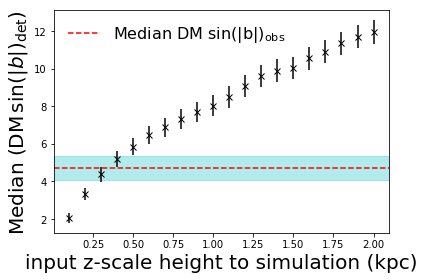

In [16]:
#pl.figure(figsize = (20, 10))

pl.errorbar(zscale, dm_sinb, yerr = dm_sinb_err, marker = 'x', ls = '', color = 'k')

pl.axhline(y = all_dmsinb_median, ls = '--', color = 'r', label = r"Median $\rm DM \ sin(\left| b \right|)_{\rm obs}$")
#pl.axhline(y = merging_dmsinb_mean, ls = '--', color = 'r', label = r"$\rm \left< DM \ sin(\left| b \right|) \right>_{\rm obs}$")
#pl.axhline(y = nonmerging_dmsinb_mean, ls = '--', color = 'r', label = r"$\rm \left< DM \ sin(\left| b \right|) \right>_{\rm obs}$")
#pl.axhline(y = dropped_dmsinb_mean, ls = '--', color = 'r', label = r"$\rm \left< DM \ sin(\left| b \right|) \right>_{\rm obs}$")

pl.axhspan(all_dmsinb_median - all_dmsinb_median_err / 2, all_dmsinb_median + all_dmsinb_median_err / 2, alpha = 0.3, color = 'c')
#pl.axhspan(merging_dmsinb_mean - merging_dmsinb_mean_err / 2, merging_dmsinb_mean + merging_dmsinb_mean_err / 2, alpha = 0.3, color = 'c')
#pl.axhspan(nonmerging_dmsinb_mean - nonmerging_dmsinb_mean_err / 2, nonmerging_dmsinb_mean + nonmerging_dmsinb_mean_err / 2, alpha = 0.3, color = 'c')
#pl.axhspan(dropped_dmsinb_mean - dropped_dmsinb_mean_err / 2, dropped_dmsinb_mean + dropped_dmsinb_mean_err / 2, alpha = 0.3, color = 'c')

pl.xlabel("input z-scale height to simulation (kpc)", fontsize = 20)
pl.ylabel(r"Median (${\rm DM} \, {\rm sin}(\left| b \right|)_{\rm det}$)", fontsize = 20)

pl.legend(loc = 'best', fontsize = 16, frameon = False)
pl.tight_layout()
pl.show()